In [4]:
%load_ext load_style
%load_style talk.css

The load_style extension is already loaded. To reload it, use:
  %reload_ext load_style


# Numpy

In [5]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [6]:
from IPython.display import Image, HTML

**Numpy** is the fundamental building block of the so-called **Python Scientific Stack**   

* It provides a special data structure, the numpy **ndarray** (*N* - dimensional array) which allows the representation 
of arrays of numerical values, integers, reals, complex  

* Numpy arrays by default can only hold objects of the same type (e.g. cannot mix integers and floats))  

* It also provides with random number capability, some convenience simple statistical functions (mean, std, ...) and some essential linear algebra operations 

In [7]:
HTML("<iframe src='http://numpy.org/' width=1000 height=500></iframe>")

The conventional way to import numpy is 
```python
import numpy as np
```

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy basics 

Constructing an numpy array 

In [10]:
x = [1,2,3,4] # x is a regular python list

In [11]:
type(x)

list

In [12]:
x = np.array(x)

In [13]:
type(x)

numpy.ndarray

In [14]:
a = np.array(range(10))

In [15]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
x = [[1,2,3],[4,5,6]] # nested lists

In [17]:
x = np.array(x)

In [18]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
x.shape

(2, 3)

The shape attribute is a tuple containing the dimensions along each **axis** (0 = rows, 1 = columns, ...)

In [20]:
x = np.arange(1000).reshape((10,10,10))

In [21]:
x.shape

(10, 10, 10)

** Be careful**: keep in mind **references** Vs. **copies** of arrays!

In [22]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
x = a

In [24]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
a[2] = 99

In [26]:
x[6] = 90

In [27]:
x

array([ 0,  1, 99,  3,  4,  5, 90,  7,  8,  9])

**x has changed !**, because x = a only means you create a new **reference** pointing to the **same object** as the array `a`  

If you want to create a **copy** instead of a reference, you need to do it explicitely

In [28]:
x = a.copy()

In [29]:
a[3] = 888

In [30]:
a

array([  0,   1,  99, 888,   4,   5,  90,   7,   8,   9])

In [31]:
x

array([ 0,  1, 99,  3,  4,  5, 90,  7,  8,  9])

### Numpy array types 

Numpy tries and guess the correct **type** of the numerical values if you pass a list, here x is of type integer 64

In [32]:
x.dtype

dtype('int64')

You can change that using the method **astype()**

In [33]:
x = x.astype(np.float)

In [34]:
x.dtype

dtype('float64')

In [35]:
x

array([  0.,   1.,  99.,   3.,   4.,   5.,  90.,   7.,   8.,   9.])

you cannot mix different types, numpy will cast all values to the safest dtype

In [36]:
x = np.array([1.0,1,1])

In [37]:
x

array([ 1.,  1.,  1.])

You can (but why would you ?) create arrays of native Python types, i.e. here an array containing 2 dictionnaries

In [38]:
x = np.array([{'A':1},(1,3)])

In that case the dtype is `Object` ('O')

In [39]:
x

array([{'A': 1}, (1, 3)], dtype=object)

### Some convenience functions for creating arrays

np.arange(*start*, **stop**, *step*, *dtype=None*)

In [40]:
np.arange(100).shape

(100,)

In [41]:
np.arange(0,100+10,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

`np.linspace(start, stop, num=50, *endpoint=True*, *retstep=False*)`

In [42]:
np.linspace(0,0.5,10, endpoint=False)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45])

same as np.arange(0,0.5, 0.05)

In [43]:
np.arange(0,0.5,0.05)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45])

`np.ones(shape, dtype=None, order='C')` creates an array of ones, similar function is np.zeros

In [44]:
np.ones((10,12))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

`np.empty` can be used to pre-allocate "empty" arrays with small memory footprint 

In [45]:
np.empty((5,5))

array([[  0.00000000e+000,   3.10503637e+231,   6.42285340e-323,
          0.00000000e+000,   2.12199579e-314],
       [  2.14027814e+161,   5.04621383e+180,   4.50618615e-144,
          7.79952704e-143,   1.14639023e-071],
       [  3.90316792e-033,   5.48272567e-057,   1.47849900e+011,
          2.16385138e+190,   3.47756046e-076],
       [  5.80384298e-057,   2.09568388e-076,   3.18582727e+020,
          4.27313072e-096,   9.08366791e+223],
       [  4.25756448e-096,   6.32299154e+233,   6.48224638e+170,
          5.22411352e+257,   2.65535072e-312]])

## Array indexing 

### Simple indexing

In [46]:
a = np.arange(25,dtype=float).reshape(5,5) # creating a 2D array, note the dtype

In [47]:
print(a)

[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  24.]]


In [48]:
a.shape

(5, 5)

In [49]:
a[0,1] # FIRST row, SECOND column, remember, Python indexing is zero-based

1.0

In [50]:
a[:,0] # first column 

array([  0.,   5.,  10.,  15.,  20.])

In [51]:
a[1,:] # second row

array([ 5.,  6.,  7.,  8.,  9.])

In [52]:
a[:,2:] # all rows from third colum

array([[  2.,   3.,   4.],
       [  7.,   8.,   9.],
       [ 12.,  13.,  14.],
       [ 17.,  18.,  19.],
       [ 22.,  23.,  24.]])

In [53]:
a[-1,:] # last row

array([ 20.,  21.,  22.,  23.,  24.])

In [54]:
a[:,::-1] # handy: reverses column order 

array([[  4.,   3.,   2.,   1.,   0.],
       [  9.,   8.,   7.,   6.,   5.],
       [ 14.,  13.,  12.,  11.,  10.],
       [ 19.,  18.,  17.,  16.,  15.],
       [ 24.,  23.,  22.,  21.,  20.]])

In [55]:
a

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.]])

slices allows to easily select **contiguous** row / colums

In [56]:
a[0:2,1:3] # first two columns, and columns 2 to 3

array([[ 1.,  2.],
       [ 6.,  7.]])

When you want to select **non-contiguous** (or repeated) rows / columns, you can use the **ix_** construct

In [57]:
a[np.ix_([0,1,3],[1,1,3])]

array([[  1.,   1.,   3.],
       [  6.,   6.,   8.],
       [ 16.,  16.,  18.]])

In [58]:
a

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.]])

### Boolean or conditional indexing

In [59]:
a = a[a>10]

In [60]:
print(a)

[ 11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.]


## Array broadcasting

### Simple possible case: scalar broadcasting

In [61]:
x = np.array([0,1,2,3]); print(x)

[0 1 2 3]


In [62]:
x.shape

(4,)

In [63]:
x + 3

array([3, 4, 5, 6])

<center>

![](files/images/broadcast_scalar.png)

</center>

### 2D broadcasting 

In [64]:
x = np.arange(12).reshape((3,4))

In [65]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [66]:
x.shape

(3, 4)

In [67]:
y = np.arange(3).reshape((3,1)); # or y = np.arange(3)[np.newaxis,:] or y = np.arange(3)[None,:]

In [68]:
y.shape

(3, 1)

In [69]:
x + y

array([[ 0,  1,  2,  3],
       [ 5,  6,  7,  8],
       [10, 11, 12, 13]])

<center> 

![](files/images/broadcast_2D.png)

</center>

### 3D broadcasting

In [70]:
x = np.arange(15).reshape((3, 5))

In [71]:
x.shape

(3, 5)

In [72]:
y = np.ones(8)

In [73]:
z = x[...,np.newaxis] + y

In [74]:
print(z)

[[[  1.   1.   1.   1.   1.   1.   1.   1.]
  [  2.   2.   2.   2.   2.   2.   2.   2.]
  [  3.   3.   3.   3.   3.   3.   3.   3.]
  [  4.   4.   4.   4.   4.   4.   4.   4.]
  [  5.   5.   5.   5.   5.   5.   5.   5.]]

 [[  6.   6.   6.   6.   6.   6.   6.   6.]
  [  7.   7.   7.   7.   7.   7.   7.   7.]
  [  8.   8.   8.   8.   8.   8.   8.   8.]
  [  9.   9.   9.   9.   9.   9.   9.   9.]
  [ 10.  10.  10.  10.  10.  10.  10.  10.]]

 [[ 11.  11.  11.  11.  11.  11.  11.  11.]
  [ 12.  12.  12.  12.  12.  12.  12.  12.]
  [ 13.  13.  13.  13.  13.  13.  13.  13.]
  [ 14.  14.  14.  14.  14.  14.  14.  14.]
  [ 15.  15.  15.  15.  15.  15.  15.  15.]]]


In [75]:
z.shape

(3, 5, 8)

<center> 

![](files/images/array_3x5x8.png)

</center>

## Array methods

We have already seen some array methods above, in this section I just dwelve into their general behavior and present some convenient array methods

In python, everything is an **object**, numpy ndarrays are no exceptions, and they expose a number of **methods**, which are equivalent to the call 
the respective numpy function, but can be more convenient to use, and - marginally - faster

In [76]:
a.shape # shape of a (like *size* in matlab)

(14,)

In [77]:
np.shape(a)

(14,)

In [78]:
%timeit a.mean() # The %timeit magic cell function times the execution of an expression

The slowest run took 9.74 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 7.29 µs per loop


In [79]:
%timeit np.mean(a)

The slowest run took 7.39 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 8.39 µs per loop


In [80]:
b = np.arange(100,dtype=float).reshape(10,10) # creating a 2D array, note the dtype

In [81]:
b.shape

(10, 10)

In [82]:
b

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.],
       [ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.],
       [ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.],
       [ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.],
       [ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.],
       [ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.],
       [ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.],
       [ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.]])

In [83]:
b.sum(0) ### summing over the first axis ('rows')

array([ 450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.])

In [84]:
np.sum(b, axis=0)

array([ 450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.])

In [85]:
b[:,0].sum()

450.0

*swapaxes* method swap the position of 2 axes

In [86]:
b = b.swapaxes(1,0)

In [87]:
b

array([[  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.],
       [  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92.],
       [  3.,  13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93.],
       [  4.,  14.,  24.,  34.,  44.,  54.,  64.,  74.,  84.,  94.],
       [  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95.],
       [  6.,  16.,  26.,  36.,  46.,  56.,  66.,  76.,  86.,  96.],
       [  7.,  17.,  27.,  37.,  47.,  57.,  67.,  77.,  87.,  97.],
       [  8.,  18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98.],
       [  9.,  19.,  29.,  39.,  49.,  59.,  69.,  79.,  89.,  99.]])

here equivalent to *transpose()* on 2D array

In [88]:
b = b.transpose()

In [89]:
b

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.],
       [ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.],
       [ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.],
       [ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.],
       [ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.],
       [ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.],
       [ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.],
       [ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.]])

In [90]:
b = np.transpose(b)

In [91]:
b

array([[  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.],
       [  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92.],
       [  3.,  13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93.],
       [  4.,  14.,  24.,  34.,  44.,  54.,  64.,  74.,  84.,  94.],
       [  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95.],
       [  6.,  16.,  26.,  36.,  46.,  56.,  66.,  76.,  86.,  96.],
       [  7.,  17.,  27.,  37.,  47.,  57.,  67.,  77.,  87.,  97.],
       [  8.,  18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98.],
       [  9.,  19.,  29.,  39.,  49.,  59.,  69.,  79.,  89.,  99.]])

argsort, argmin and argmax returns the indices that would sort an array (along an axis), and the indices of min and max values

In [92]:
a = np.array([11,13,15,17,19,18,16,14,12,10])

In [93]:
a.argsort()

array([9, 0, 8, 1, 7, 2, 6, 3, 5, 4])

In [94]:
a.sort(); print(a)

[10 11 12 13 14 15 16 17 18 19]


### array functions

we've seen above array `methods`, available through the object-oriented interface of Python, now we're gonna see a few useful numpy `functions`

In [95]:
from scipy import misc

In [96]:
img = misc.lena()

In [97]:
img.shape

(512, 512)

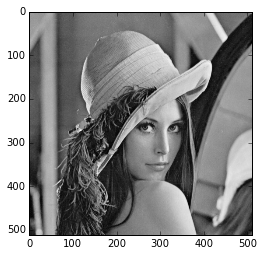

In [98]:
plt.imshow(img, cmap=plt.get_cmap('gray'))

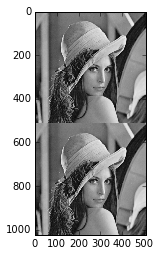

In [99]:
plt.imshow(np.tile(img, (2,1)), cmap=plt.get_cmap('gray'))

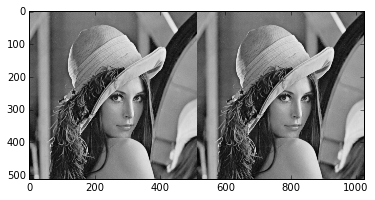

In [100]:
plt.imshow(np.tile(img, (1,2)), cmap=plt.get_cmap('gray'))

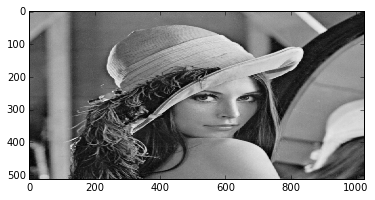

In [101]:
plt.imshow(np.repeat(img, 2, axis=1), cmap=plt.get_cmap('gray'))

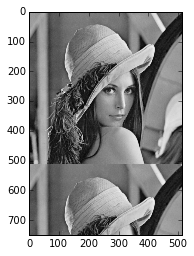

In [102]:
plt.imshow(np.resize(img, (750,512)), cmap=plt.get_cmap('gray'))

### Universal functions

A universal function (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of scalar inputs and produces a fixed number of scalar outputs.

In [103]:
x = np.sin(np.linspace(-2*np.pi, 2*np.pi, 10000).reshape((100,100)))

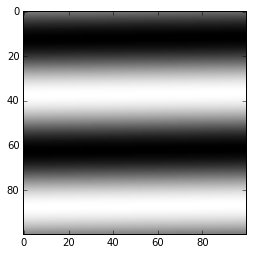

In [104]:
plt.imshow(x, cmap=plt.get_cmap('gray_r'))

vectorization

In [105]:
def max100(x): 
    """
    returns the max between x and 100
    """

    return(max(x,100))

In [106]:
x = np.random.normal(loc=50, scale=100, size=(10,10))

In [107]:
x

array([[ 108.33394901,  222.96356835,  -11.30611425,   35.37050778,
        -150.78057661,  176.94130391,  -59.78313323,   58.18632632,
          55.25130913,  -51.19958079],
       [-100.13970214,  -43.52333414,  165.06938719,  274.12015384,
          85.63529114,  120.85108495,  -20.53602797,  -40.7532164 ,
         174.20437925,  -28.53661627],
       [  11.156414  ,   47.54924003,   47.96343903,   13.01637507,
         188.83304963,   39.54912154,  -84.22437652, -122.96608946,
         141.85036785,  166.99799196],
       [  52.03700879,  135.3106727 ,  209.96653769,  169.64661606,
          43.76688097,  -40.34403867,  113.69134647,  -32.35731837,
         -84.08136   ,   81.6974629 ],
       [ -36.37930058,  127.12265165,  -37.08050311,   11.67775452,
         132.91069713,  108.3171158 ,  116.75601005,  -66.662876  ,
          53.78517304,  198.52024352],
       [ 189.04590467,  115.17597705,  112.62610813,   96.93076842,
         179.72378839,  120.10304454,  -98.88655481,   30

In [108]:
max100(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

that fails because max100 is just a regular python function, that expects a single object

but we can build easily a `vectorized` version of the same function (i.e. building a `ufunc`mm)

In [109]:
vmax100 = np.vectorize(max100)

In [110]:
z = vmax100(x)

In [111]:
z.shape

(10, 10)

In [112]:
z

array([[ 108.33394901,  222.96356835,  100.        ,  100.        ,
         100.        ,  176.94130391,  100.        ,  100.        ,
         100.        ,  100.        ],
       [ 100.        ,  100.        ,  165.06938719,  274.12015384,
         100.        ,  120.85108495,  100.        ,  100.        ,
         174.20437925,  100.        ],
       [ 100.        ,  100.        ,  100.        ,  100.        ,
         188.83304963,  100.        ,  100.        ,  100.        ,
         141.85036785,  166.99799196],
       [ 100.        ,  135.3106727 ,  209.96653769,  169.64661606,
         100.        ,  100.        ,  113.69134647,  100.        ,
         100.        ,  100.        ],
       [ 100.        ,  127.12265165,  100.        ,  100.        ,
         132.91069713,  108.3171158 ,  116.75601005,  100.        ,
         100.        ,  198.52024352],
       [ 189.04590467,  115.17597705,  112.62610813,  100.        ,
         179.72378839,  120.10304454,  100.        ,  100

Numpy provides a number of already vectorized mathematical functions (`ufuncs` again). e.g. `round`, `fix` and all basic trigonometric (`sin, cos, tan, sic`), exponential (`exp, exp2, sinh, cosh`), and logarithmic functions (`log, log10, log2`).

## Missing values in numpy 

You can handle missing values in Numpy in two different ways: 
    
1. By using the np.nan (not a number) special type
2. By casting a numpy array into a **Masked array** using the <font color='red'>ma</font> module

Using the masked array approach, while somehow more cumbersome, allows more flexibility

In [ ]:
from numpy import ma

In [ ]:
b[5,5] = -999.

In [ ]:
print(b)

In [ ]:
c = b.copy()

In [ ]:
c[c == -999.] = np.nan

In [ ]:
print(c)

```nan``` values propagates automatically when using *aggregation* functions

In [ ]:
c.mean(1)

Unless you use one of the - few - NaN functions

In [ ]:
np.nansum(c,axis=1)

Now we're gonna see how to use the **`ma` (Masked Arrays) module**

In [ ]:
b = ma.masked_values(b, -999.)

In [ ]:
print(b)

```b``` has now two new attributes: data, and mask

In [ ]:
print(b.data) 

In [ ]:
print(b.mask)

In [ ]:
b.mean(1)

In [ ]:
c = b.mean(1)

In [ ]:
c.shape

Masked values are just ignored in calculations 

Other masked array functions allow to set masked values according to some conditions, all (I think) functions exposed for regular numpy arrays are available.

In [ ]:
b = ma.ma

In [ ]:
b

In [ ]:
b.mean(0)

## Random numbers

You can generate random numbers coming from a wide range of distributions



In [113]:
np.random.

SyntaxError: invalid syntax (<ipython-input-113-cc2fb4ff81f1>, line 1)

If you want more distributions, and more flexibility, you need to look into scipy.stats.distributions (see the statistical modelling notebook)

**Example 1: Normal distribution**   

$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$


In [ ]:
x = np.random.normal(0,1,1000)

In [ ]:
x = np.random.standard_normal(1000)

In [ ]:
_ = plt.hist(x, color='0.6',normed=True)

**Example 2: Poisson distribution**    

\begin{equation*}
P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}
\end{equation*}

In [ ]:
poiss = np.random.poisson(lam=4, size=(10000))

In [ ]:
#a = np.array([len(np.where(poiss==x)[0]) for x in np.unique(poiss)])

In [ ]:
a = np.array([sum(poiss==x) for x in np.unique(poiss)])

In [ ]:
f, ax = plt.subplots()
ax.plot(np.unique(poiss), a/10000., '-', color='grey')
ax.plot(np.unique(poiss), a/10000., 'o', color='purple', markersize=10)
ax.set_title("Poisson Empirical PMF, $\lambda = 4$", fontsize=20)
ax.set_xlim(-1,17)
ax.set_ylim(0,0.25)
[l.set_fontsize(16) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(16) for l in ax.yaxis.get_ticklabels()];

In [ ]:
import math # the math module exposes mathematical functions operating on scalars

In [ ]:
lam = 4; end = 20 # lambda is a reserved word in python 

In [ ]:
P = [math.exp(-lam)*lam**x/math.factorial(x) for x in xrange(end)] # note the use of a list comprehension

In [ ]:
f, ax = plt.subplots()
ax.plot(P, '-', color='grey')
ax.plot(P, 'o', color='purple', markersize=10)
ax.set_title("Poisson PMF, $\lambda = 4$", fontsize=20)
ax.set_xlim(-1,17)
ax.set_ylim(0,0.25)
[l.set_fontsize(16) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(16) for l in ax.yaxis.get_ticklabels()];

From Wikipedia (http://en.wikipedia.org/wiki/Poisson_distribution)


<!--![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)-->
![Discrete variable](files/images/poisson_pmf.png)
